In [1]:
import io
from pprint import pprint
from konlpy.tag import Twitter

In [2]:
pos_tagger = Twitter()

def tokenize(doc):
    return ['/'.join(t) for t in pos_tagger.pos(doc, norm=True, stem=True)]

def read_data(filename):
    with open(filename, mode='r', encoding='UTF-8', errors='strict', buffering=1) as f:
        data = [line.split('\n') for line in f.read().splitlines()]
        data = data[1:] # header 제외
    return data

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [5]:
lines = read_data('../dataset/simpan.txt')
pprint(lines[0:10])

[[''],
 [' '],
 [''],
 [' 나. 청구법인은 2012사업연도 법인세 신고시「조세특례제한법」(이하 “조특법”이라 한다) 제10조 제1항 제3호 나목의 '
  '당기발생액OOO 기준에 따라 연구·인력개발비 세액공제 OOO원을 신청하였으나, 2017.10.19. 조특법 제10조 제1항 제3호 '
  '가목의 증가분 방식을 적용할 경우 2012사업연도 법인세 연구·인력개발비 세액공제는 OOO원이므로 법인세 OOO원을 환급해 달라는 '
  '경정청구를 제기하였다.'],
 [''],
 [' '],
 [''],
 [' 다. 처분청은 분할전 분할법인의 각 사업연도별 발생한 연구ㆍ인력개발비가 구분경리에 의해 사업별로 확인되고, 투자사업을 영위하는 '
  '청구법인에서는 분할 이후 연구ㆍ인력개발비가 발생하지 않아 직전 4년간 발생한 연구ㆍ인력개발비는 전액 분할신설법인인 OOO '
  '주식회사(화장품제약사업연구소운영)에서 발생된 것으로 보아야 하므로, 청구법인에게 증가분 방식의 연구·인력개발비 세액공제를 적용할 경우 '
  '환급세액이 없다고 보아 2017.12.22. 경정청구를 거부하였다.'],
 [''],
 [' ']]


In [6]:
# 특수문자 제거
lines = [[word.replace("'","").replace('"',"") for word in line] for line in lines]

In [ ]:
pumsa = [[tokenize(word) for word in line] for line in lines]
pumsa

In [9]:
# 3차원 리스트를 2차원으로 변경
line2dim = [e for sl in pumsa for e in sl]

In [10]:
sentences = []
for words in line2dim:
    temp = ''
    for word in words:
        txt = word.split('/')
        if txt[1] == 'Noun' and len(txt[0]) > 1:
            temp += txt[0]+' '
        
    sentences.append(temp.strip())

# 빈리스트 제거
sentences_remove_empty = [s for s in sentences if s]
# 중복리스트 제거
sentences_remove_dup = list(set(sentences_remove_empty))

In [11]:
# 정제완료
sentences_remove_dup

corpus = sentences_remove_dup
corpus

['따라서 처분 확인 규정 해석 조특법 시행 단서 실질 기준 대통령령 통해 개정 부칙 공포 시행 창설 규정 해당 처분 경정 청구 거부 처분',
 '청구 법인 과거 과세 관청 일관 매출 견해 표명 장하나 인력 개발 구분 경리 사업 별로 확인 경우 해당 사업 발생 인력 개발 비만 사업 법인 발생 해석 청구인 주장 신의성실 원칙 위배',
 '해당 과세 도의 수입 금액 연구 인력 개발 차지 비율',
 '항의 계산 적용 개월 월력 계산 과세 연도 개시 일이 달이 개월 미만 경우 개월 과세 연도 종료 일이 달이 개월 미만 경우 산입',
 '연구개발 출연 금등 지급 연구개발 지출 금액 성장동력 연구개발 기술 연구개발 일반 연구 인력 개발 산정 외한',
 '청구 법인 경정 청구 세액 산출 방식 다음',
 '청구 법인 주장 처분 의견',
 '따라서 분할 법인 사업 도중 투자 사업 관련 발생 인력 개발 비만 청구 법인 세액 공제 대상 해당 하나 분할 법인 발생 인력 개발 전액 화장품 사업 연구소 부분 발생 비용 투자 사업 부문 운영 청구 법인 직전 사업 연도 발생 인력 개발 보아 기분 방식 세액 공제',
 '청구 법인 분할 경우 분할 법인 전체 연구 인력 개발 평균 사업 연도 발생 증가 발생',
 '기간 이후 이내 과세 연도',
 '적용 일반 연구 인력 개발 성장동력 연구개발 기술 연구개발 대통령령 구분 경리',
 '조특법 시행 분할 설법 배분 직전 평균 연구 인력 개발 사업 경우 상정 계산 금액 분할 경우 분할 설법 사업 연도 발생 연구 인력 개발 분할 이후 사업 연도 발생 것이므 차감 분할 설법 직전 평균 연구 인력 개발 비도 분할 이후 사업 연도 개월 분만 산정 논리 타당 따라서 분할 법인 직전 평균 연구 인력 개발 산정 분할 설법 사업 연도 개월 개월 해당 직전 평균 연구 인력 개발 금액 분할 신설 법인 금액 산정 직전 평균 연구 인력 개발 차감 합리 조특법 시행 분할 설법 경우 항의 계산 해당 과세 연도 개시 소급 발생 일반 연구 인력 개발 합계 규정 항의 계산 후단 

In [12]:
words = []
for text in corpus:
    for word in text.split(' '):
        words.append(word)

words = set(words)
words

{'가능성',
 '가목',
 '가액',
 '각각',
 '간의',
 '간주',
 '개발',
 '개시',
 '개월',
 '개정',
 '거나',
 '거래',
 '거부',
 '거부처분',
 '건의',
 '것이므',
 '견해',
 '결과',
 '결론',
 '결정',
 '경리',
 '경우',
 '경정',
 '계산',
 '계획',
 '고려',
 '고시',
 '공적',
 '공제',
 '공통',
 '공포',
 '과거',
 '과세',
 '과세표준',
 '관련',
 '관청',
 '관할',
 '관행',
 '구분',
 '국세',
 '귀속',
 '귀책사유',
 '규정',
 '근거',
 '금등',
 '금액',
 '금지',
 '기간',
 '기본',
 '기분',
 '기술',
 '기존',
 '기준',
 '기획재정부',
 '나목',
 '납세',
 '내용',
 '논리',
 '다만',
 '다시',
 '다음',
 '단서',
 '달라',
 '달리',
 '달이',
 '당부',
 '대법원',
 '대상',
 '대통령령',
 '대하',
 '대한',
 '대해',
 '도의',
 '도중',
 '따라서',
 '또한',
 '뜻임',
 '로부터',
 '로서',
 '매출',
 '명시',
 '명칭',
 '목적',
 '무시',
 '문대',
 '미만',
 '발생',
 '방법',
 '방식',
 '배분',
 '배하',
 '배한',
 '범위',
 '법규',
 '법령',
 '법률',
 '법인',
 '법인세',
 '법적',
 '법적안정성',
 '변경',
 '별개',
 '별도',
 '별로',
 '보기',
 '보아',
 '부문',
 '부분',
 '부여',
 '부칙',
 '분만',
 '분야',
 '분할',
 '불복',
 '비도',
 '비만',
 '비명',
 '비용',
 '비율',
 '사례',
 '사실',
 '사실관계',
 '사안',
 '사업',
 '사정',
 '사항',
 '산업',
 '산입',
 '산정',
 '산출',
 '상기',
 '상당',
 '상대방',
 '상정',
 '상호',
 '서류',
 '선고',
 '선택',
 '설법',
 '성립

In [13]:
word2int = {}

for i,word in enumerate(words):
    word2int[word] = i

sentences = []
for sentence in corpus:
    sentences.append(sentence.split())
    
WINDOW_SIZE = 2

data = []
for sentence in sentences:
    for idx, word in enumerate(sentence):
        for neighbor in sentence[max(idx - WINDOW_SIZE, 0) : min(idx + WINDOW_SIZE, len(sentence)) + 1] : 
            if neighbor != word:
                data.append([word, neighbor])

#data

In [15]:
import pandas as pd

df = pd.DataFrame(data, columns = ['input', 'label'])
df.head()

,input,label
0,따라서,처분
1,따라서,확인
2,처분,따라서
3,처분,확인
4,처분,규정


In [16]:
len(words)

287

In [17]:
import tensorflow as tf
import numpy as np

ONE_HOT_DIM = len(words)

# function to convert numbers to one hot vectors
def to_one_hot_encoding(data_point_index):
    one_hot_encoding = np.zeros(ONE_HOT_DIM)
    one_hot_encoding[data_point_index] = 1
    return one_hot_encoding

X = [] # input word
Y = [] # target word

for x, y in zip(df['input'], df['label']):
    X.append(to_one_hot_encoding(word2int[ x ]))
    Y.append(to_one_hot_encoding(word2int[ y ]))

# convert them to numpy arrays
X_train = np.asarray(X)
Y_train = np.asarray(Y)

# making placeholders for X_train and Y_train
x = tf.placeholder(tf.float32, shape=(None, ONE_HOT_DIM))
y_label = tf.placeholder(tf.float32, shape=(None, ONE_HOT_DIM))

# word embedding will be 2 dimension for 2d visualization
EMBEDDING_DIM = 5 

# hidden layer: which represents word vector eventually
W1 = tf.Variable(tf.random_normal([ONE_HOT_DIM, EMBEDDING_DIM]))
b1 = tf.Variable(tf.random_normal([1])) #bias
hidden_layer = tf.add(tf.matmul(x,W1), b1)

# output layer
W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM, ONE_HOT_DIM]))
b2 = tf.Variable(tf.random_normal([1]))
prediction = tf.nn.softmax(tf.add( tf.matmul(hidden_layer, W2), b2))

# loss function: cross entropy
loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(prediction), axis=[1]))

# training operation
train_op = tf.train.GradientDescentOptimizer(0.05).minimize(loss)

In [18]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init) 

iteration = 10001
for i in range(iteration):
    # input is X_train which is one hot encoded word
    # label is Y_train which is one hot encoded neighbor word
    sess.run(train_op, feed_dict={x: X_train, y_label: Y_train})
    if i % 1000 == 0:
        print('iteration '+str(i)+' loss is : ', sess.run(loss, feed_dict={x: X_train, y_label: Y_train}))

iteration 0 loss is :  8.188481
iteration 1000 loss is :  6.190597
iteration 2000 loss is :  5.6434894
iteration 3000 loss is :  5.2485785
iteration 4000 loss is :  5.015646
iteration 5000 loss is :  4.86503
iteration 6000 loss is :  4.758847
iteration 7000 loss is :  4.6803803
iteration 8000 loss is :  4.6201124
iteration 9000 loss is :  4.5713997
iteration 10000 loss is :  4.530442


In [19]:
vectors = sess.run(W1 + b1)
print(vectors)

[[-0.9094934  -0.916549   -1.8854289  -0.6996536  -1.3253455 ]
 [-1.1311132  -0.5030854  -1.0603375   0.02141517 -0.22111401]
 [-1.8564099   0.36208498  0.23875052  0.39170945 -0.3805143 ]
 ...
 [-0.7372909  -0.9245447  -1.9202547  -1.6735984  -0.45413584]
 [-1.1132333  -1.6536891  -0.7805815  -0.5135823  -0.8113946 ]
 [-0.36541146 -0.29109895 -1.4957469  -0.5623026  -0.77757627]]


In [32]:
w2v_df = pd.DataFrame(vectors, columns = ['x1', 'x2','x3','x4','x5'])
w2v_df.index = words
w2v_df.to_csv("./word2vec-simpan-5.w2v", mode='w')

In [33]:
w2v_df.head()

,x1,x2,x3,x4,x5
직전,-0.909493,-0.916549,-1.885429,-0.699654,-1.325346
실제,-1.131113,-0.503085,-1.060338,0.021415,-0.221114
판결,-1.856410,0.362085,0.238751,0.391709,-0.380514
통해,0.688861,0.485824,-1.456998,-0.208306,0.008658
논리,-1.010738,-1.042440,-0.302304,0.145447,-0.168285


In [36]:
from sklearn.manifold import TSNE
import pickle

In [38]:
%%time
USE_PREMADE_TSNE = False

tsne_filepath = './tsne.pkl'

if not USE_PREMADE_TSNE:
    
    tsne = TSNE(random_state=0)
    tsne_points = tsne.fit_transform(w2v_df.values)
    with open(tsne_filepath, 'wb') as f:
        pickle.dump(tsne_points, f)
else:
    with open(tsne_filepath, 'rb') as f:
        tsne_points = pickle.load(f)

tsne_df = pd.DataFrame(tsne_points, index=w2v_df.index, columns=['x_coord', 'y_coord'])
tsne_df['word'] = tsne_df.index

CPU times: user 1.18 s, sys: 5.16 ms, total: 1.18 s
Wall time: 1.18 s


In [41]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource, value

output_notebook()

Loading BokehJS ...

In [42]:
# prepare the data in a form suitable for bokeh.
plot_data = ColumnDataSource(tsne_df)

# create the plot and configure it
tsne_plot = figure(title='t-SNE Word Embeddings',
                   plot_width = 800,
                   plot_height = 800,
                   active_scroll='wheel_zoom'
                  )

# add a hover tool to display words on roll-over
tsne_plot.add_tools( HoverTool(tooltips = '@word') )

tsne_plot.circle('x_coord', 'y_coord', source=plot_data,
                 color='red', line_alpha=0.2, fill_alpha=0.1,
                 size=10, hover_line_color='orange')

# adjust visual elements of the plot
tsne_plot.title.text_font_size = value('16pt')
tsne_plot.xaxis.visible = False
tsne_plot.yaxis.visible = False
tsne_plot.grid.grid_line_color = None
tsne_plot.outline_line_color = None

# show time!
show(tsne_plot);

In [40]:
#!pip3 install bokeh

    100% |████████████████████████████████| 16.3MB 189kB/s 
    100% |████████████████████████████████| 276kB 146kB/s 
    100% |████████████████████████████████| 3.7MB 284kB/s 
  Running setup.py bdist_wheel for bokeh ... done
  Stored in directory: /Users/paul/Library/Caches/pip/wheels/a2/0d/1e/d5ecb93d15d5c7558fb3ac84018487fc1b24de63b2459a7822
  Running setup.py bdist_wheel for PyYAML ... done
  Stored in directory: /Users/paul/Library/Caches/pip/wheels/ad/da/0c/74eb680767247273e2cf2723482cb9c924fe70af57c334513f
Successfully built bokeh PyYAML


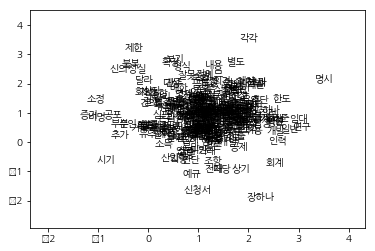

In [22]:

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fig, ax = plt.subplots()

for word, x1, x2 in zip(w2v_df['word'], w2v_df['x1'], w2v_df['x2']):
    ax.annotate(word, (x1,x2 ))
    
path = '../../../font/NanumGothic.ttf'
font_name = fm.FontProperties(fname = path).get_name()
plt.rc('font', family = font_name)

PADDING = 1.0
x_axis_min = np.amin(vectors, axis=0)[0] - PADDING
y_axis_min = np.amin(vectors, axis=0)[1] - PADDING
x_axis_max = np.amax(vectors, axis=0)[0] + PADDING
y_axis_max = np.amax(vectors, axis=0)[1] + PADDING

plt.xlim(x_axis_min,x_axis_max)
plt.ylim(y_axis_min,y_axis_max)

plt.show()